### Linear Regression with Python using Scikit Learn

Linear Regression Theory: The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points.

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

### TASK : Percentage score prediction of a student against number of hours studied.

So let's get started..

###  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  Importing Dataset from given URL

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
## checking head of dataset..
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Visualization

Text(0, 0.5, 'Percentage Score')

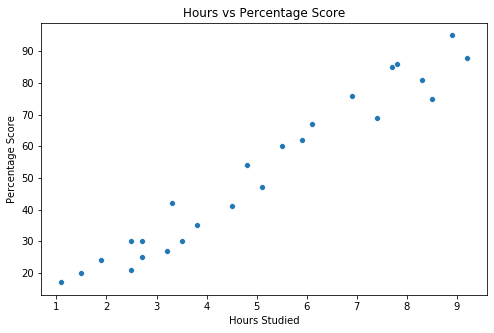

In [4]:
## lets plot distribution of score against no of hrs studied by student..

plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Hours'], y = df['Scores'], data =df)
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  


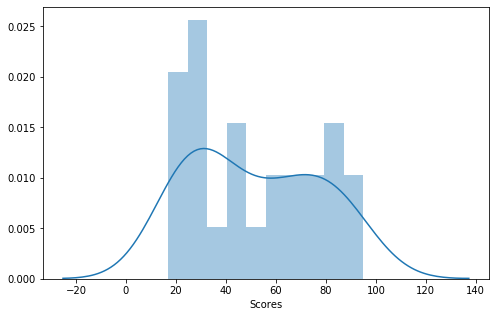

In [5]:
## Distribution plot for percntage of scores..

plt.figure(figsize=(8,5))
sns.distplot(df['Scores'], bins = 10)

### Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [6]:
X = df[['Hours']]
y = df[['Scores']]

### Train Test split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y,test_size = 0.2, random_state = 101 ) 

### Creating and Training the Model
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [12]:
## Print the intercept..

print(lm.intercept_)
print(lm.coef_)

[2.5121293]
[[9.73330705]]


Text(0, 0.5, 'Percentage Score')

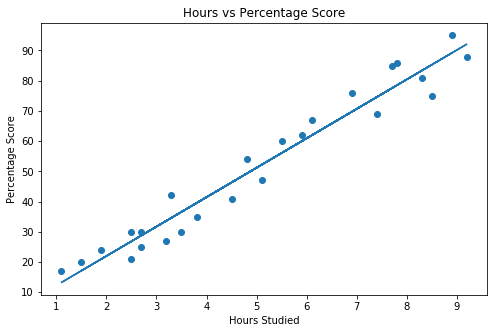

In [13]:
## Plotting regression line as follows..

line = lm.coef_*X + lm.intercept_

## Plotting for the test data

plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

### Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [14]:
print('Training score :', lm.score(X_train, y_train))
print('Test score :', lm.score(X_test, y_test))

Training score : 0.954930331163377
Test score : 0.9377551740781869


In [15]:
predictions = lm.predict(X_test)

In [16]:
print('No of Hours = ',9.25)
print('Predicted percentage Score = ',lm.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted percentage Score =  92.54521954029958


### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.937597792467706
MSE: 26.675642597052256
RMSE: 5.164846812544614
